# <font color='red'> LESSON 4B: Regression model</font>

  * <span style="color:blue">**Evaluating model performance**</span> 
    * Bias and variance
    * K-fold Cross-Validation
    * Akaike criterion (AIC)
  * <span style="color:blue">**Linear regression - model tuning**</span>
    * Change distribution of target variable (skewness)
    * Ridge regression
    * Lasso regression
    * Elastic-Net regression
    * GLM model
  * <span style="color:blue">**Model comparision**</span>
    * 4 different models (1 model / team)

## Regression tasks
GOAL: To predict the outcome of a given sample where the output variable continuous quantity.
Example labels such as: sale price, age, size, quantities

This means that we can use the following algorithms:

* **Linear regression**
* **Lasso regression**
* **Ridge regression**
* Regression tree
* Random forest
* Gradient Boosting 
* Support Vector Regression
* K Nearest Neighbours Regressors
* Gaussian Process Regression
* Neural Network Models
* **Elastic-Net regression**
* **GLM model**

### Our dataset after datamart fine-tuning

In [1]:
import pandas as pd
import numpy as np

data = pd.read_parquet('./data/full_data.parquet')
data

,MSSubClass_120,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_OTHER,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,label
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,1,...,-0.488321,-0.830489,1.164283,0.428636,0.373509,-0.787243,0.350520,-0.359325,-0.270208,208500
2,0,1,0,0,0,0,1,0,0,1,...,0.532289,0.289638,-0.796041,-0.502349,-0.051541,1.768105,-0.811747,-0.359325,-0.270208,181500
3,0,0,0,1,0,0,1,0,0,1,...,-0.327437,-0.653917,1.191828,0.586571,0.663315,-0.787243,-0.011497,-0.359325,-0.270208,223500
4,0,0,0,0,1,0,1,0,0,1,...,-0.739702,-0.540801,0.939328,0.443182,0.827539,-0.787243,-0.144872,4.092524,-0.270208,140000
5,0,0,0,1,0,0,1,0,0,1,...,0.238172,-0.033157,1.621080,1.442744,1.764579,0.859156,0.788753,-0.359325,-0.270208,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,0,1,0,0,1,0,0,1,...,-0.244481,-0.562873,0.797009,0.297716,-0.051541,-0.787243,-0.049605,-0.359325,-0.270208,175000
1457,0,1,0,0,0,0,1,0,0,1,...,1.236157,2.527134,-0.796041,1.182983,0.141664,2.205430,-0.811747,-0.359325,-0.270208,210000
1458,0,0,0,0,1,0,1,0,0,1,...,0.255769,0.085477,1.848330,1.737833,-1.056203,-0.787243,0.331467,-0.359325,-0.270208,266500


## Evaluating model performance

### Bias and variance

**Bias** is the inability for a machine learning method to capture the true relationship.

**Variance** is the difference in fits among datasets.

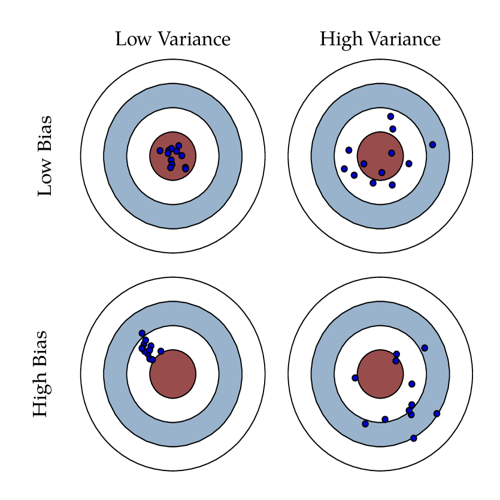

In [2]:
from PIL import Image, ImageOps
Image.open('images/bias_var.png').resize((500,500))

Let's look how bias and variance can look while fitting models.

The left graph shows model which is too simple to explain the variance. We can predict that the line fails to cover all the points in the graph, causing the **underfitting** of the data and thus has a **high bias error**.

The right graph shows model which is forcely fitted. It may look like a useful graph that covers all points, however, this model would lead to poor prediction results on different dataset due to its complexity. We call such model **overfitted**. The model has a **high variance error**.

Lastly, the middle graph shows **appropriate fitting** as it has a pretty good predicted line. The line covers most of the points in the graph, and we can deduce that there is a **balance between bias and variance**.

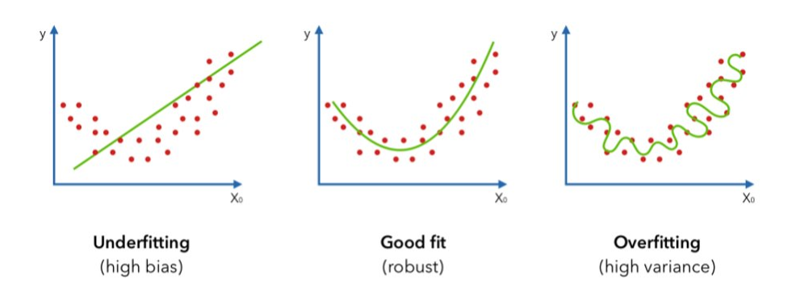

In [3]:
Image.open('images/over_underfitting.png').resize((800,300))

How to find the best model?

We are trying to find the optimal trade-off between variance and bias while minimizing the total error.

There are three main methods to find the optimal model complexity - regularization, bagging, boosting. Last lesson we used bagging in random forest algorithm and boosting in gradient boosting algorithm. Now we will focus on regularization.

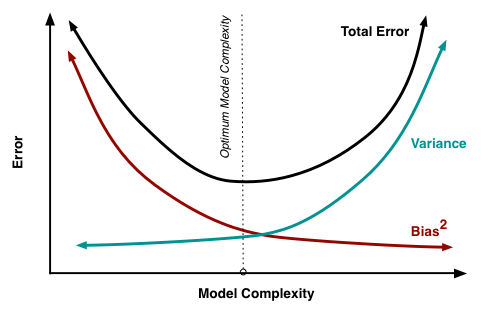

In [4]:
Image.open('images/model_complexity.png')

### K-fold Cross-Validation

Cross-Validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has parameter *k* that defines number of groups that a given data sample is supposed to be split into. The model is trained on *k-1* groups, and on the remaining group it is tested. We repeat this *k* times, so each fold is exactly once validation/testing group.

It gives us:
* more accurate estimate of the accuracy of the model
* the best choice of paramaters

In the example below **k=5**, therefore we talk about 5-fold cross-validation. The model is trained on 4 folds and on remaining 1 it is tested.

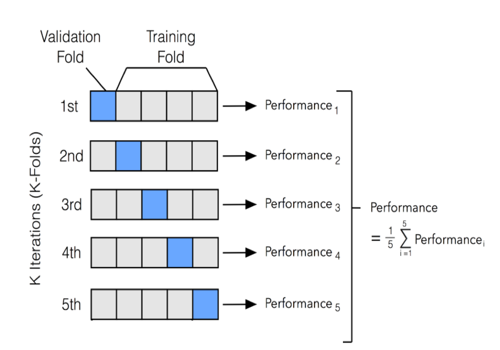

In [5]:
Image.open('images/kfolds.png').resize((500,350))

## Evaluation metrics

With trained model we can evalute its performance. Performance metrics are different for regression and classification. The most often used metrics for evaluating regression models are:

* **R2 score**: This score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.
* **Mean squared error**: This is the average of the squares of the errors of all the data points in the given dataset. 
* **Root mean squared error = RMSE**: This is the root of mean squared error.

* **Mean absolute error**: This is the average of absolute errors of all the data points in the given dataset.
* **Median absolute error**: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.

Ideally, lower RMSE and higher R-squared values are indicative of a good model.


Create custom function with evaluation metrics

In [6]:
import sklearn.metrics as sme

def evaluate_model(y_test, y_pred):
    print("R2 score =", round(sme.r2_score(y_test, y_pred), 2))
    print("RMSE =", round((np.sqrt(sme.mean_squared_error(y_test, y_pred))), 10))

### Akaike criterion (AIC)

The Akaike Information Criterion is a method for scoring and selecting a model.

**AIC = n * LL + 2 * k**

Where n is the number of examples in the training dataset, LL is the log-likelihood for the model using the natural logarithm (e.g. the log of the MSE), and k is the number of parameters in the model.

Lower AIC indicates a better model.

Create custom function to calculate AIC

In [7]:
from math import log

def calculate_aic(n, mse, num_params):    # n=len(y_test), mse=sme.mean_squared_error(y_test, y_pred), num_params=len(model.coef_)+1
    aic = n * log(mse) + 2 * num_params
    return aic

## Model tuning

### Change distribution of target variable (skewness)

First let's check the distribution of target variable

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.20 and sigma = 79415.29



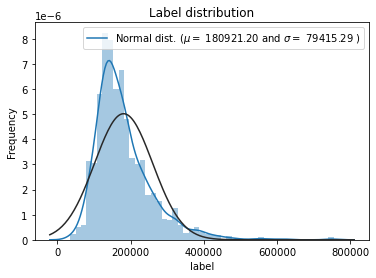

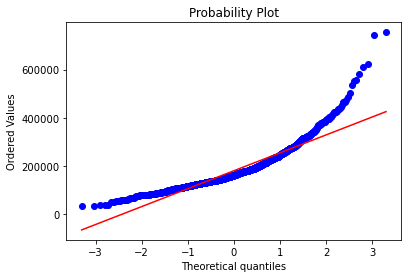

In [8]:
from scipy import stats
from scipy.stats import norm, skew 
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data['label'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['label'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Label distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['label'], plot=plt)
plt.show()

The target variable is right skewed. We need to transform this variable and make it more normally distributed, as linear models perform better with normally distributed data.

Log-transformation of the target variable

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



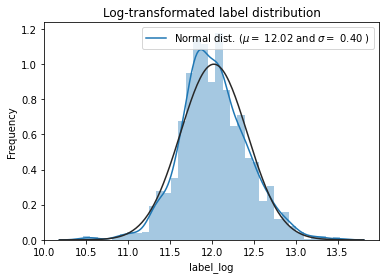

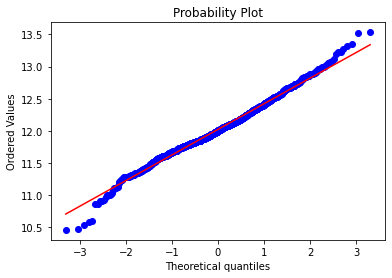

In [9]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data["label_log"] = np.log1p(data["label"])

#Check the new distribution 
sns.distplot(data['label_log'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['label_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Log-transformated label distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['label_log'], plot=plt)
plt.show()

### Feature selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable.

The main reasons for performing feature selection are:

* **Reduces Overfitting**: Less redundant data decreases the possibility of making decisions based on noise.
* **Improves Accuracy**: Irrelevant features can decrease accuracy, hence less misleading data means better accuracy.
* **Reduces Training Time**: Less data results in faster training.

### Correlation

Calculate correlation to see the relationships among features and how features are correlated with label variable

In [10]:
corrmat = data.corr()
display(corrmat)

,MSSubClass_120,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_OTHER,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,label,label_log
MSSubClass_120,1.000000,-0.191721,-0.083268,-0.127745,-0.153036,0.018879,-0.067908,0.065025,-0.016170,0.016170,...,0.113572,-0.200382,-0.095825,0.031345,0.066637,0.029191,-0.059054,0.041979,0.062944,0.092984
MSSubClass_20,-0.191721,1.000000,-0.251941,-0.386515,-0.463037,-0.090566,0.297224,-0.279221,-0.004503,0.004503,...,0.381563,-0.603369,-0.248403,0.116926,0.024607,-0.041679,-0.119783,0.007809,0.041274,0.054811
MSSubClass_50,-0.083268,-0.251941,1.000000,-0.167870,-0.201105,-0.037774,-0.143537,0.190133,-0.021249,0.021249,...,-0.150258,0.145053,0.026896,-0.197204,-0.075428,-0.123774,0.153572,0.039244,-0.156692,-0.173561
MSSubClass_60,-0.127745,-0.386515,-0.167870,1.000000,-0.308524,0.044677,0.154909,-0.207849,-0.032600,0.032600,...,-0.128023,0.687304,0.502148,0.269948,0.157281,0.313609,-0.109624,0.017045,0.377197,0.401501
MSSubClass_OTHER,-0.153036,-0.463037,-0.201105,-0.308524,1.000000,0.073034,-0.330959,0.329777,0.057424,-0.057424,...,-0.257590,0.039784,-0.153738,-0.256640,-0.154582,-0.172278,0.158072,-0.072725,-0.316056,-0.357541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OpenPorchSF,0.029191,-0.041679,-0.123774,0.313609,-0.172278,0.162708,-0.016567,-0.091380,-0.006858,0.006858,...,0.204386,0.219093,0.347625,0.277133,0.081119,1.000000,-0.108847,0.034706,0.369024,0.383019
EnclosedPorch,-0.059054,-0.119783,0.153572,-0.109624,0.158072,-0.010843,-0.159896,0.190614,-0.023082,0.023082,...,-0.080555,0.062261,0.009765,-0.122231,-0.127853,-0.108847,1.000000,-0.082864,-0.128578,-0.149050
ScreenPorch,0.041979,0.007809,0.039244,0.017045,-0.072725,-0.054569,0.061666,-0.033662,0.033160,-0.033160,...,0.096923,0.040801,0.104222,0.052759,-0.079510,0.034706,-0.082864,1.000000,0.111447,0.121208
label,0.062944,0.041274,-0.156692,0.377197,-0.316056,0.010606,0.245063,-0.288065,-0.041036,0.041036,...,0.620743,0.316547,0.708153,0.630138,0.330378,0.369024,-0.128578,0.111447,1.000000,0.948374


### Removing correlated columns

First, let's remove correlated columns to prevent multicollinearity - situation, when predictors are correlated to other predictors. Predictors with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In [11]:
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
X = data[selected_columns]

display(X)

,MSSubClass_120,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_OTHER,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,label
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,1,...,-0.488321,-0.830489,1.164283,0.428636,0.373509,-0.787243,0.350520,-0.359325,-0.270208,208500
2,0,1,0,0,0,0,1,0,0,1,...,0.532289,0.289638,-0.796041,-0.502349,-0.051541,1.768105,-0.811747,-0.359325,-0.270208,181500
3,0,0,0,1,0,0,1,0,0,1,...,-0.327437,-0.653917,1.191828,0.586571,0.663315,-0.787243,-0.011497,-0.359325,-0.270208,223500
4,0,0,0,0,1,0,1,0,0,1,...,-0.739702,-0.540801,0.939328,0.443182,0.827539,-0.787243,-0.144872,4.092524,-0.270208,140000
5,0,0,0,1,0,0,1,0,0,1,...,0.238172,-0.033157,1.621080,1.442744,1.764579,0.859156,0.788753,-0.359325,-0.270208,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,0,1,0,0,1,0,0,1,...,-0.244481,-0.562873,0.797009,0.297716,-0.051541,-0.787243,-0.049605,-0.359325,-0.270208,175000
1457,0,1,0,0,0,0,1,0,0,1,...,1.236157,2.527134,-0.796041,1.182983,0.141664,2.205430,-0.811747,-0.359325,-0.270208,210000
1458,0,0,0,0,1,0,1,0,0,1,...,0.255769,0.085477,1.848330,1.737833,-1.056203,-0.787243,0.331467,-0.359325,-0.270208,266500


Assign label and features to their own variables

In [12]:
y = data.label.values
y_log = data.label_log.values
X = X.drop(['label'], axis=1)

### Features selection using f_regression()

Similarly, feature selection can be performed using **f_regression()** function

Using **SelectKBest()** function we select *k=20* best features

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=20)

X_1 = fs.fit_transform(X, y)
X_2 = fs.fit_transform(X, y_log)

display(X_1.shape)
display(X_2.shape)

(1460, 20)

(1460, 20)

Get names of selected features

In [14]:
display(fs.get_support()) 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,

In [15]:
features_names = X.columns[fs.get_support()]
display(features_names)

Index(['ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Ex',
       'BsmtQual_TA', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'FullBath_1',
       'FullBath_2', 'KitchenQual_TA', 'Fireplaces_0', 'GarageFinish_Unf',
       'GarageCars_3', 'YearBuilt_b_Newest', 'YearRemodAdd_b_Oldest',
       'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea'],
      dtype='object')

### Splitting dataset into train and test
Let's split our dataset into train and test, it is important these two do not mix during the training.
This means we will train on 70% of the data and test on the remaining 30%. We will use the label with changed distribution.

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_2, y_log, test_size = 0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 20)
(438, 20)
(1022,)
(438,)


To see the effect of changing distribution of target variable, let's create second batch of data where the label has original distribution

In [17]:
x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(X_1, y, test_size = 0.3, random_state=42)
print(x_train_0.shape)
print(x_test_0.shape)
print(y_train_0.shape)
print(y_test_0.shape)

(1022, 20)
(438, 20)
(1022,)
(438,)


### <font color='orange'>Linear Regression</font>
We have prepared data for the model training. We can now use them to train a simple Linear regression.

Basic info about Linear Regression:
* Predicts continuous variable
* Assumes the relationship between a dependent continuous variable Y and one or more explanatory variables X is linear
* Easy to interpret the results
* Sensitive to outliers
* **Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Predicted variable is a linear equation:
$$ y_i =\beta_0+\beta_1x_1 ... $$

**y** is response variable

**x** is feature

**beta_0** is the intercept (the value of  y  when  x = 0)

**beta_1**  is the slope (the change in  y  divided by change in  x) = coefficient for each x

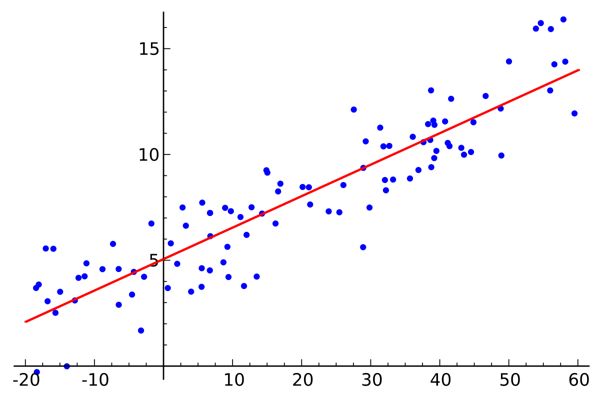

In [18]:
Image.open('images/linear_regression.png').resize((600,397))

The prediction of line is done by **Least Squares method** and it works by minimizing the **sum of the squared residuals** = sum(actual value - predicted value)^2 

See the *example* below. First image show data points in 2D plot. The aim is to find best fit to the data using Least Squares method.

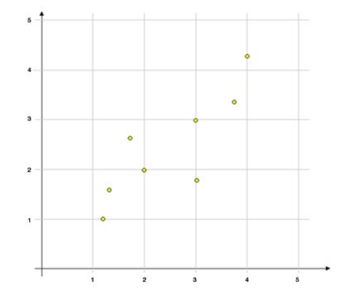

In [19]:
Image.open('images/lsm.png').resize((350,300))

There is many way how to fit line to the data. By using Least Square method, we can find the best one while minimizing the sum of squares

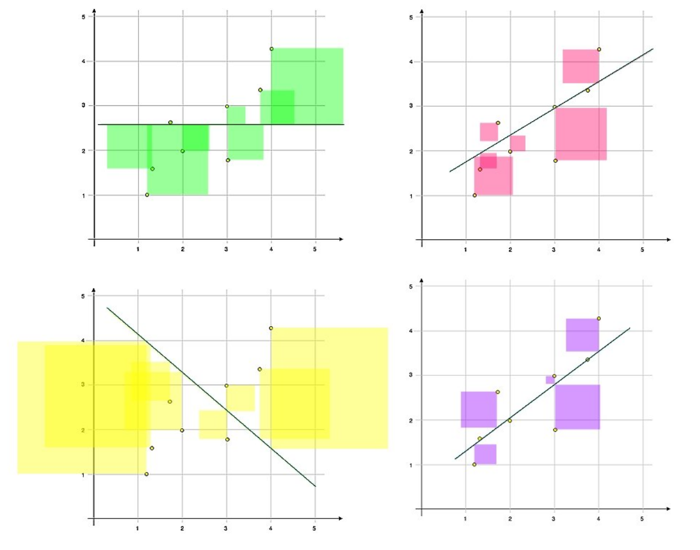

In [20]:
Image.open('images/ls.png').resize((700,550))

#### Comparision of model performance using original and new label

Now when it's hopefully clear how linear regression fits the data, let's define model with default parameters

In [21]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

Fit the model and make predictions using original label

In [22]:
lin_model.fit(x_train_0, y_train_0)
y_pred_0 = lin_model.predict(x_test_0)

Fit the model and make predictions using new label with changed distribution

In [23]:
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)

Compare performance of model trained on data with original label vs. data with new label (with changed distribution)

In [24]:
display("Original label")
evaluate_model(y_test_0, y_pred_0)

'Original label'

R2 score = 0.83
RMSE = 34292.392616304


In [25]:
display("New label")
evaluate_model(y_test, y_pred)

'New label'

R2 score = 0.85
RMSE = 0.1615452227


Visualizing predictions and target values

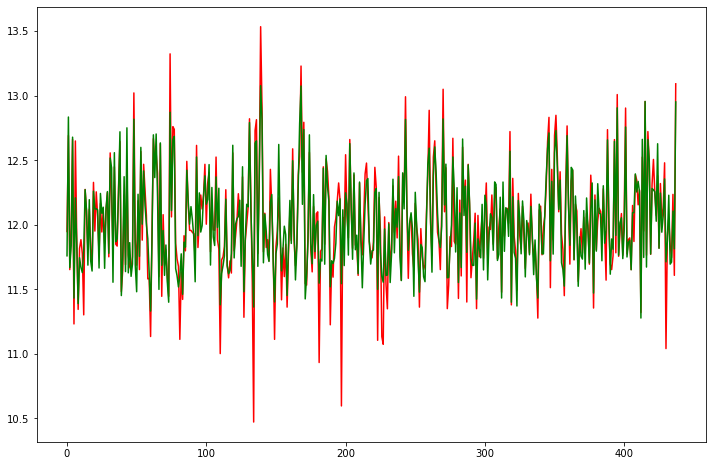

In [26]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color='red')
#plt.plot(y_pred_0, color='blue')
plt.plot(y_pred, color='green')
plt.show()

#### Model interpretation

Show model's intercept and coefficients

In [27]:
display(lin_model.intercept_)
display(lin_model.coef_)

12.10206255314314

array([ 0.04060707,  0.01185095,  0.04643201,  0.11716395, -0.04375612,
        0.07204297,  0.0485096 , -0.04314828, -0.0615249 , -0.0474642 ,
       -0.10484349, -0.02277421, -0.00411928,  0.01633188, -0.11772422,
        0.04274427,  0.08189021, -0.0161703 ,  0.12683411,  0.06341145])

The coefficients define how big effect the given feature has on prediction. With higher coefficient the effect is increasing.

Create a dataframe containing features names and their coefficients (in absolute value), then sort it from highest coefficient to lowest

In [28]:
pairs = pd.DataFrame(features_names, columns=["predictors"])
pairs['coefficients'] = abs(lin_model.coef_)
sorted_pairs = pairs.sort_values(by=["coefficients"], axis=0, ascending=False)
display(sorted_pairs)

,predictors,coefficients
18,GrLivArea,0.126834
14,YearRemodAdd_b_Oldest,0.117724
3,BsmtQual_Ex,0.117164
10,Fireplaces_0,0.104843
16,TotalBsmtSF,0.081890
5,BsmtFinType1_GLQ,0.072043
19,GarageArea,0.063411
8,FullBath_2,0.061525
6,HeatingQC_Ex,0.048510
9,KitchenQual_TA,0.047464


#### Linear regression using statsmodels

We can use models from different libraries, one of them is *statsmodels*. It works similarly like *scikit-learn* models - first, we define the model, then we fit the data. 

In [29]:
import statsmodels.api as sm

ols_model = sm.OLS(y_train, x_train)
res = ols_model.fit()

With this method, we can print some model statistics

In [30]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3807.
Date:                Tue, 04 May 2021   Prob (F-statistic):                        0.00
Time:                        11:49:34   Log-Likelihood:                         -1773.2
No. Observations:                1022   AIC:                                      3586.
Df Residuals:                    1002   BIC:                                      3685.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

It is also possible to get directly those metrics of our interest

In [31]:
display("AIC: ", round(res.aic, 3))

'AIC: '

3586.366


### <font color='orange'>Ridge (L2) Regression</font>

Ridge regression is **regularization method** used for **small sample sizes** to avoid overfitting on train data and thus improve predictions made from new data -> **reduce variance** by making the predictions less sensitive to train data.

This is done by adding **Ridge Regression penalty** = **lambda * slope^2** to the term which needs to be minimize

So when ridge regression determines values for parameters in this equation:

y = y-axis intercept + slope * x

it minimizes

**the sum of the squared residuals + lambda * slope^2**

where

**slope^2** 
- adds penalty to the traditional least squares methods

**lambda** 
- determines how severe that penalty is 
- if equals to 0, ridge regression minimizes only the sum of squared residuals -> linear regression
- with higher lambda, the slope gets asymptotically to zero (the larger lambda gets, the target becomes less and less sensitive to value of x)
- therefore predictions with ridge regression line are less sensitive to change in x value than least squares line

How to decide which value to give to lambda? 
Try a **set of values for lambda and use cross-validation**, to determine which lambda value results in lowest variance.

Note: The lambda is in *scikit-learn* models named as alpha. We can set it manually or use default value. We define and fit the model in usual way

In [32]:
from sklearn.linear_model import Ridge

rr_model = Ridge(alpha=1)
rr_model.fit(x_train, y_train)

Ridge(alpha=1)

The cross-validation is directly implemented in *RidgeCV* method, we just set the number of folds in *cv* argument

In [33]:
from sklearn.linear_model import RidgeCV

rrcv_model = RidgeCV(cv=5)
rrcv_model.fit(x_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

### <font color='orange'>Lasso (L1) Regression</font>

Lasso regression is another **regularization method**.

It adds **Lasso Regression penalty** = **lambda * |slope|** to the term which needs to be minimize

So when lasso regression determines values for parameters in this equation:

y = y-axis intercept + slope * x

it minimizes

**the sum of the squared residuals + lambda * |slope|**

The big difference between Ridge and Lasso regression is that Ridge regression can only shrink asymptotically close to 0, while Lasso can shrink the slope all the way to 0. This way Lasso can exclude useless variables from equation and is better in decreasing variance when training data contains useless variables.

In [34]:
from sklearn.linear_model import Lasso, LassoCV

lr_model = Lasso(alpha=0.1)
lr_model.fit(x_train, y_train)

lrcv_model =LassoCV(n_alphas=100)
rrcv_model.fit(x_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

### <font color='orange'>Elastic-Net Regression</font>

Combines Ridge regression penalty with Lasso regression penalty. Each of them gets their own lambdas, to find the best parameters is used cross-validation.

In [35]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en_model = ElasticNet(random_state=42)
en_model.fit(x_train, y_train)

encv_model = ElasticNetCV(alphas=[1e-2, 1e-1, 1], l1_ratio=0.5, cv=5)
encv_model.fit(x_train, y_train)

ElasticNetCV(alphas=[0.01, 0.1, 1], cv=5)

Predict labels and calculate AIC

In [36]:
y_pred = encv_model.predict(x_test)

n = len(y_test)
mse = sme.mean_squared_error(y_test, y_pred)
num_params = len(encv_model.coef_) + 1

aic = calculate_aic(n, mse, num_params)
print('AIC: %.3f' % aic)

AIC: -1543.163


Look at the parameters

In [37]:
display(encv_model.get_params())

{'alphas': [0.01, 0.1, 1],
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': False,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

With all of these regularization methods we can againg check the coefficients to see the effect of individual features to the target variable

In [38]:
pairs = pd.DataFrame(features_names, columns=["predictors"])
pairs['coefficients'] = abs(encv_model.coef_)
sorted_pairs = pairs.sort_values(by=["coefficients"], axis=0, ascending=False)
display(sorted_pairs)

,predictors,coefficients
18,GrLivArea,0.126532
14,YearRemodAdd_b_Oldest,0.092248
10,Fireplaces_0,0.084097
16,TotalBsmtSF,0.077595
19,GarageArea,0.069916
5,BsmtFinType1_GLQ,0.059337
2,Foundation_PConc,0.051114
3,BsmtQual_Ex,0.046724
6,HeatingQC_Ex,0.046415
9,KitchenQual_TA,0.044000


### <font color='orange'>GLM model</font>

Generalized linear model is a generalization of linear regression that allows for response variables to have other distribution than normal. 
(https://www.statsmodels.org/stable/glm.html)

There are three components in generalized linear models:
* Linear predictor - linear combination of parameter (beta) and explanatory variable (x)
* Link function - "links" the linear predictor and the parameter for probability distribution
* Probability distribution - probability distribution which generates the observed variable y


An example of GLM is Poisson regression. In the case of Poisson regression, the typical link function is the log link function.

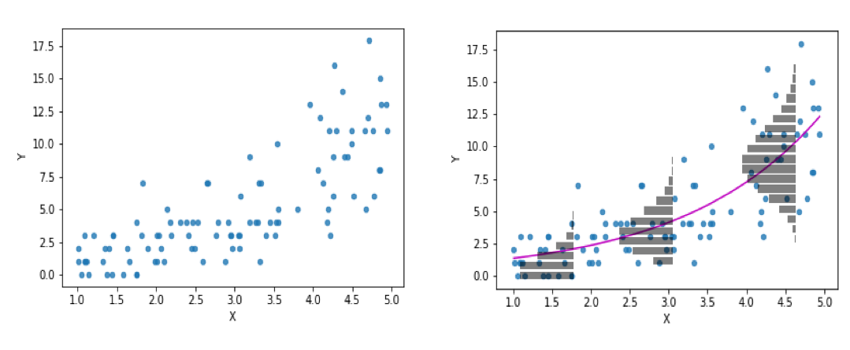

In [39]:
Image.open('images/poisson.png').resize((850,350))

Define model (family defines the probability distribution), fit to the data and print summary

In [40]:
glm_model = sm.GLM(y_train_0, x_train, family=sm.families.Poisson())
glm_results = glm_model.fit()

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1022
Model:                            GLM   Df Residuals:                     1002
Model Family:                 Poisson   Df Model:                           19
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.9557e+07
Date:                Tue, 04 May 2021   Deviance:                   1.7910e+08
Time:                        11:49:34   Pearson chi2:                 2.19e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4183      0.001   2742.515      0.0

## Model Comparision

Each team will get different model and parameters to use. Train and evaluate given model.

After you are done, compare results with other teams (R2, RMSE, AIC) and find the best model.

 ### <font color='yellow'>Team 1 (yellow)</font> 
 
 **Model:** Elastic-Net regression, l1_ratio = 0.75
 
**Solution:**

 ### <font color='red'>Team 2 (red)</font> 
 
 **Model:** Lasso regression, n_alphas = 150

**Solution:**

 ### <font color='green'>Team 3 (green)</font> 
 
**Model:** Ridge regression, alphas = [1e-3, 1e-2, 1e-1, 1, 1e1]

**Solution:**

 ### <font color='blue'>Team 4 (blue)</font> 
 
**Model:** GLM, Gamma distribution 

**Solution:**